### ALP Data Mining - Responsi
#### 0706022210014 - Belinda Putri Adi Permana & 0706022210048 - Stanley Tan Ibrahim

Dataset Source : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition<br>
Dataset Link (Github) : https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv

# What is this dataset about?
#### This is a dataset from UCI called **"Estimation of Obesity Levels Based on Eating Habits and Physical Condition."** It contains data from individuals in Mexico, Peru, and Colombia, with 17 attributes related to eating habits and physical condition, used to classify obesity levels. The dataset includes 2111 records, with 77% synthetic and 23% real data.

# Dataset Description

| Variable Name                  | Role        | Type        | Demographic | Description                                                                 | Units | Missing Values |
|--------------------------------|-------------|-------------|-------------|-----------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature     | Categorical | Gender      |                                                                             |       | no             |
| Age                            | Feature     | Continuous  | Age         |                                                                             |       | no             |
| Height                         | Feature     | Continuous  |             |                                                                             |       | no             |
| Weight                         | Feature     | Continuous  |             |                                                                             |       | no             |
| family_history_with_overweight | Feature     | Binary      |             | Has a family member suffered or suffers from overweight?                    |       | no             |
| FAVC                           | Feature     | Binary      |             | Do you eat high caloric food frequently?                                    |       | no             |
| FCVC                           | Feature     | Integer     |             | Do you usually eat vegetables in your meals?                                |       | no             |
| NCP                            | Feature     | Continuous  |             | How many main meals do you have daily?                                      |       | no             |
| CAEC                           | Feature     | Categorical |             | Do you eat any food between meals?                                          |       | no             |
| SMOKE                          | Feature     | Binary      |             | Do you smoke?                                                               |       | no             |
| CH2O                           | Feature     | Continuous  |             | How much water do you drink daily?                                          |       | no             |
| SCC                            | Feature     | Binary      |             | Do you monitor the calories you eat daily?                                  |       | no             |
| FAF                            | Feature     | Continuous  |             | How often do you have physical activity?                                    |       | no             |
| TUE                            | Feature     | Integer     |             | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature     | Categorical |             | How often do you drink alcohol?                                             |       | no             |
| MTRANS                         | Feature     | Categorical |             | Which transportation do you usually use?                                    |       | no             |
| NObeyesdad                     | Target      | Categorical |             | Obesity level                                                               |       | no             |

1. Import Library

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.naive_bayes import GaussianNB

2. Import Database

In [155]:
url = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(url)

3. EDA

In [156]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [158]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [159]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [160]:
unique_values = {col: df[col].unique() for col in df.columns}
for column, unique_vals in unique_values.items():
    print(f"Unique values in '{column}' column: {unique_vals}")

Unique values in 'Gender' column: ['Female' 'Male']
Unique values in 'Age' column: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Unique values in 'Height' column: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Unique values in 'Weight' column: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Unique values in 'family_history_with_overweight' column: ['yes' 'no']
Unique values in 'FAVC' column: ['no' 'yes']
Unique values in 'FCVC' column: [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204

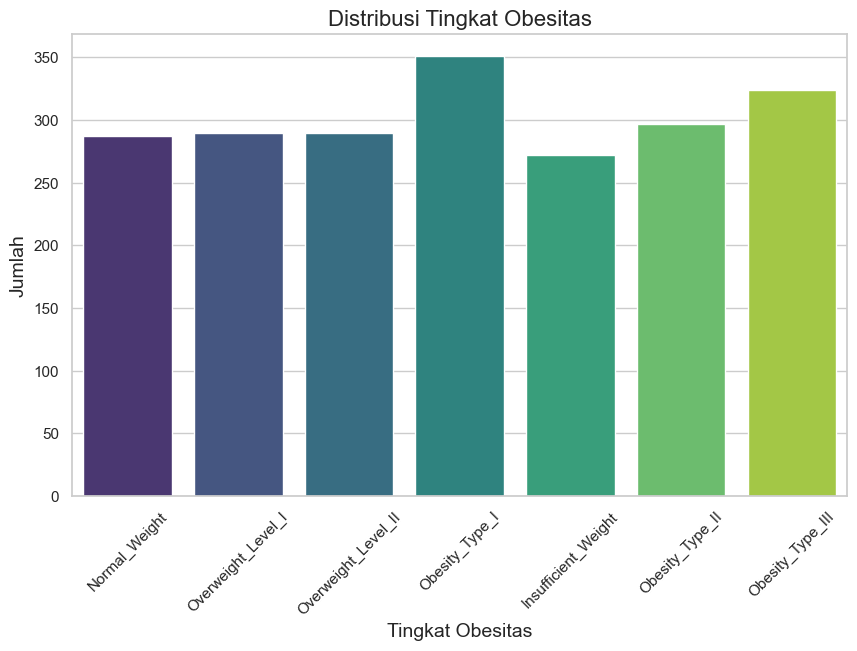

In [161]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', palette='viridis')
plt.title('Distribusi Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.show()

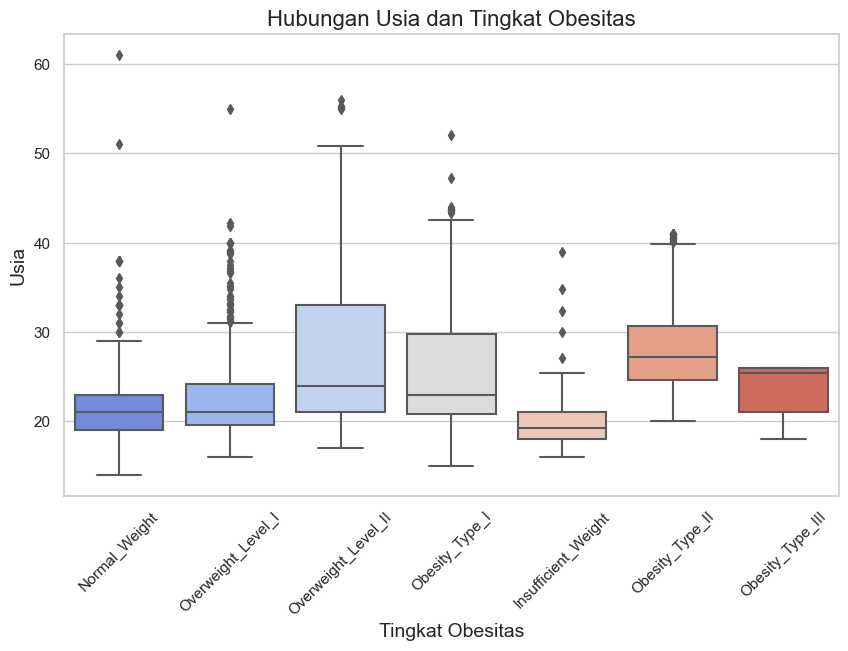

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Age', palette='coolwarm')
plt.title('Hubungan Usia dan Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Usia', fontsize=14)
plt.xticks(rotation=45)
plt.show()

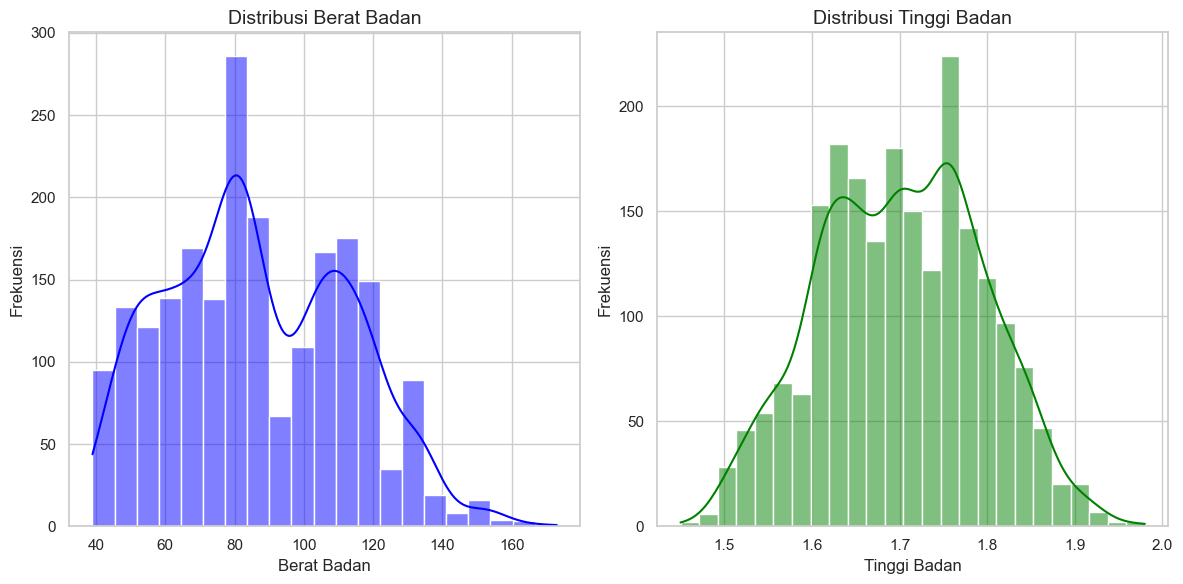

In [163]:
plt.figure(figsize=(12, 6))

# Plot Weight distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Weight'], kde=True, color='blue')
plt.title('Distribusi Berat Badan', fontsize=14)
plt.xlabel('Berat Badan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Plot Height distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Height'], kde=True, color='green')
plt.title('Distribusi Tinggi Badan', fontsize=14)
plt.xlabel('Tinggi Badan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

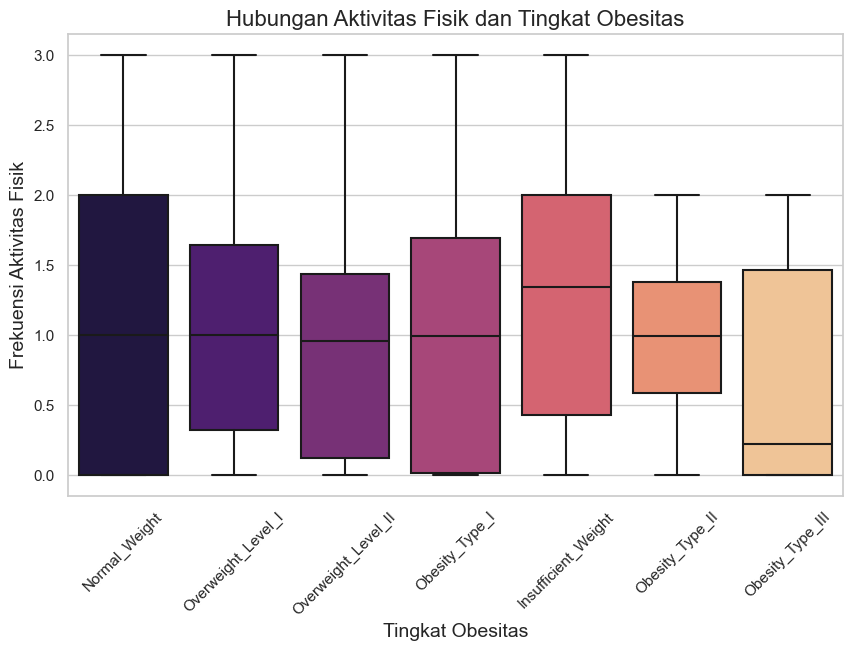

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FAF', palette='magma')
plt.title('Hubungan Aktivitas Fisik dan Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Frekuensi Aktivitas Fisik', fontsize=14)
plt.xticks(rotation=45)
plt.show()

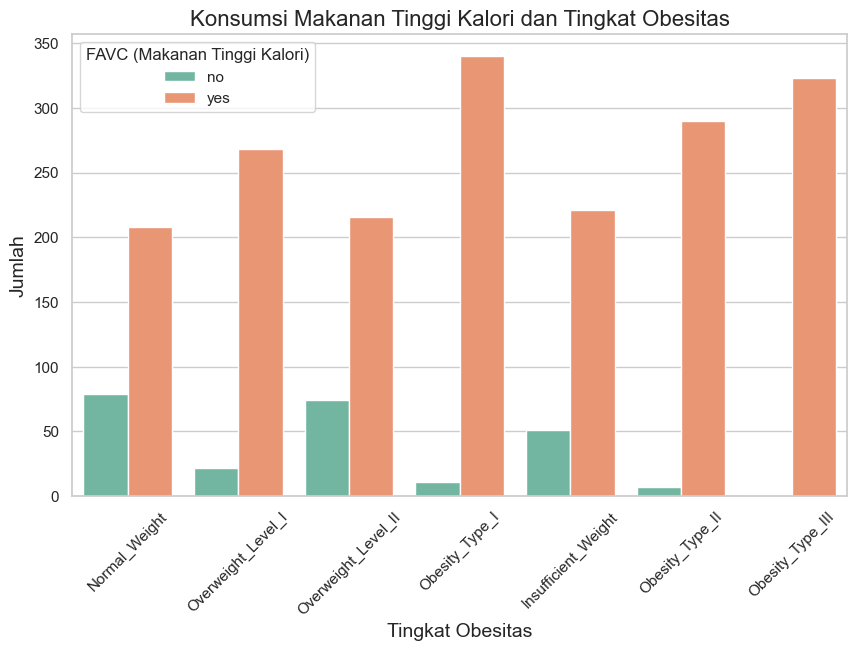

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='FAVC', palette='Set2')
plt.title('Konsumsi Makanan Tinggi Kalori dan Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='FAVC (Makanan Tinggi Kalori)')
plt.show()

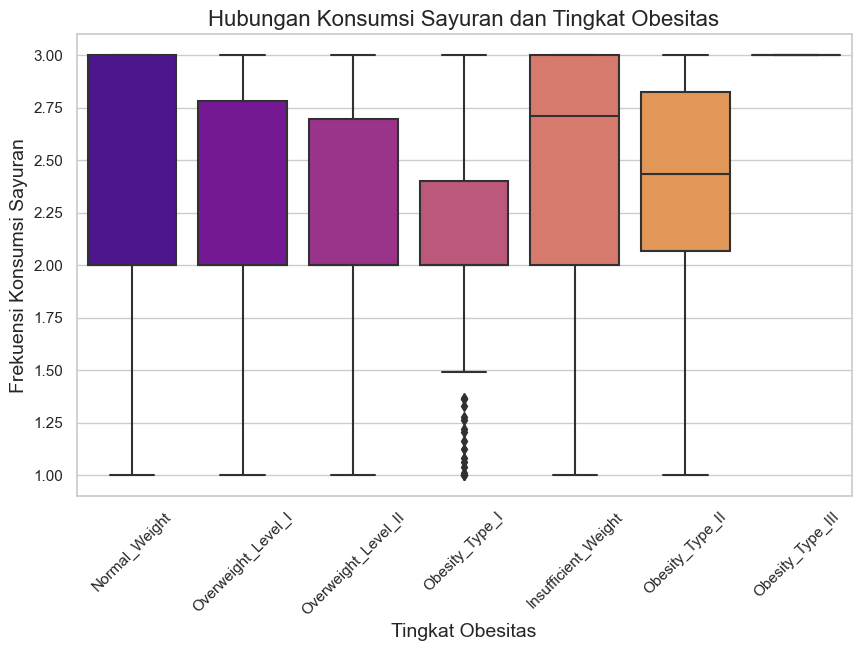

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NObeyesdad', y='FCVC', palette='plasma')
plt.title('Hubungan Konsumsi Sayuran dan Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Frekuensi Konsumsi Sayuran', fontsize=14)
plt.xticks(rotation=45)
plt.show()

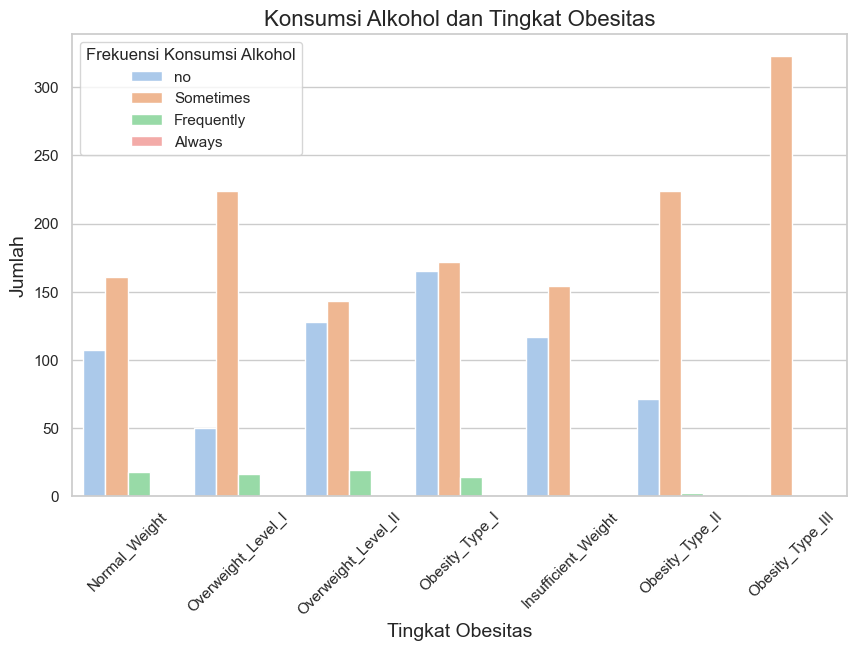

In [167]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='CALC', palette='pastel')
plt.title('Konsumsi Alkohol dan Tingkat Obesitas', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Frekuensi Konsumsi Alkohol')
plt.show()

C:\Users\Belinda\AppData\Local\Temp\ipykernel_21096\1584907614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


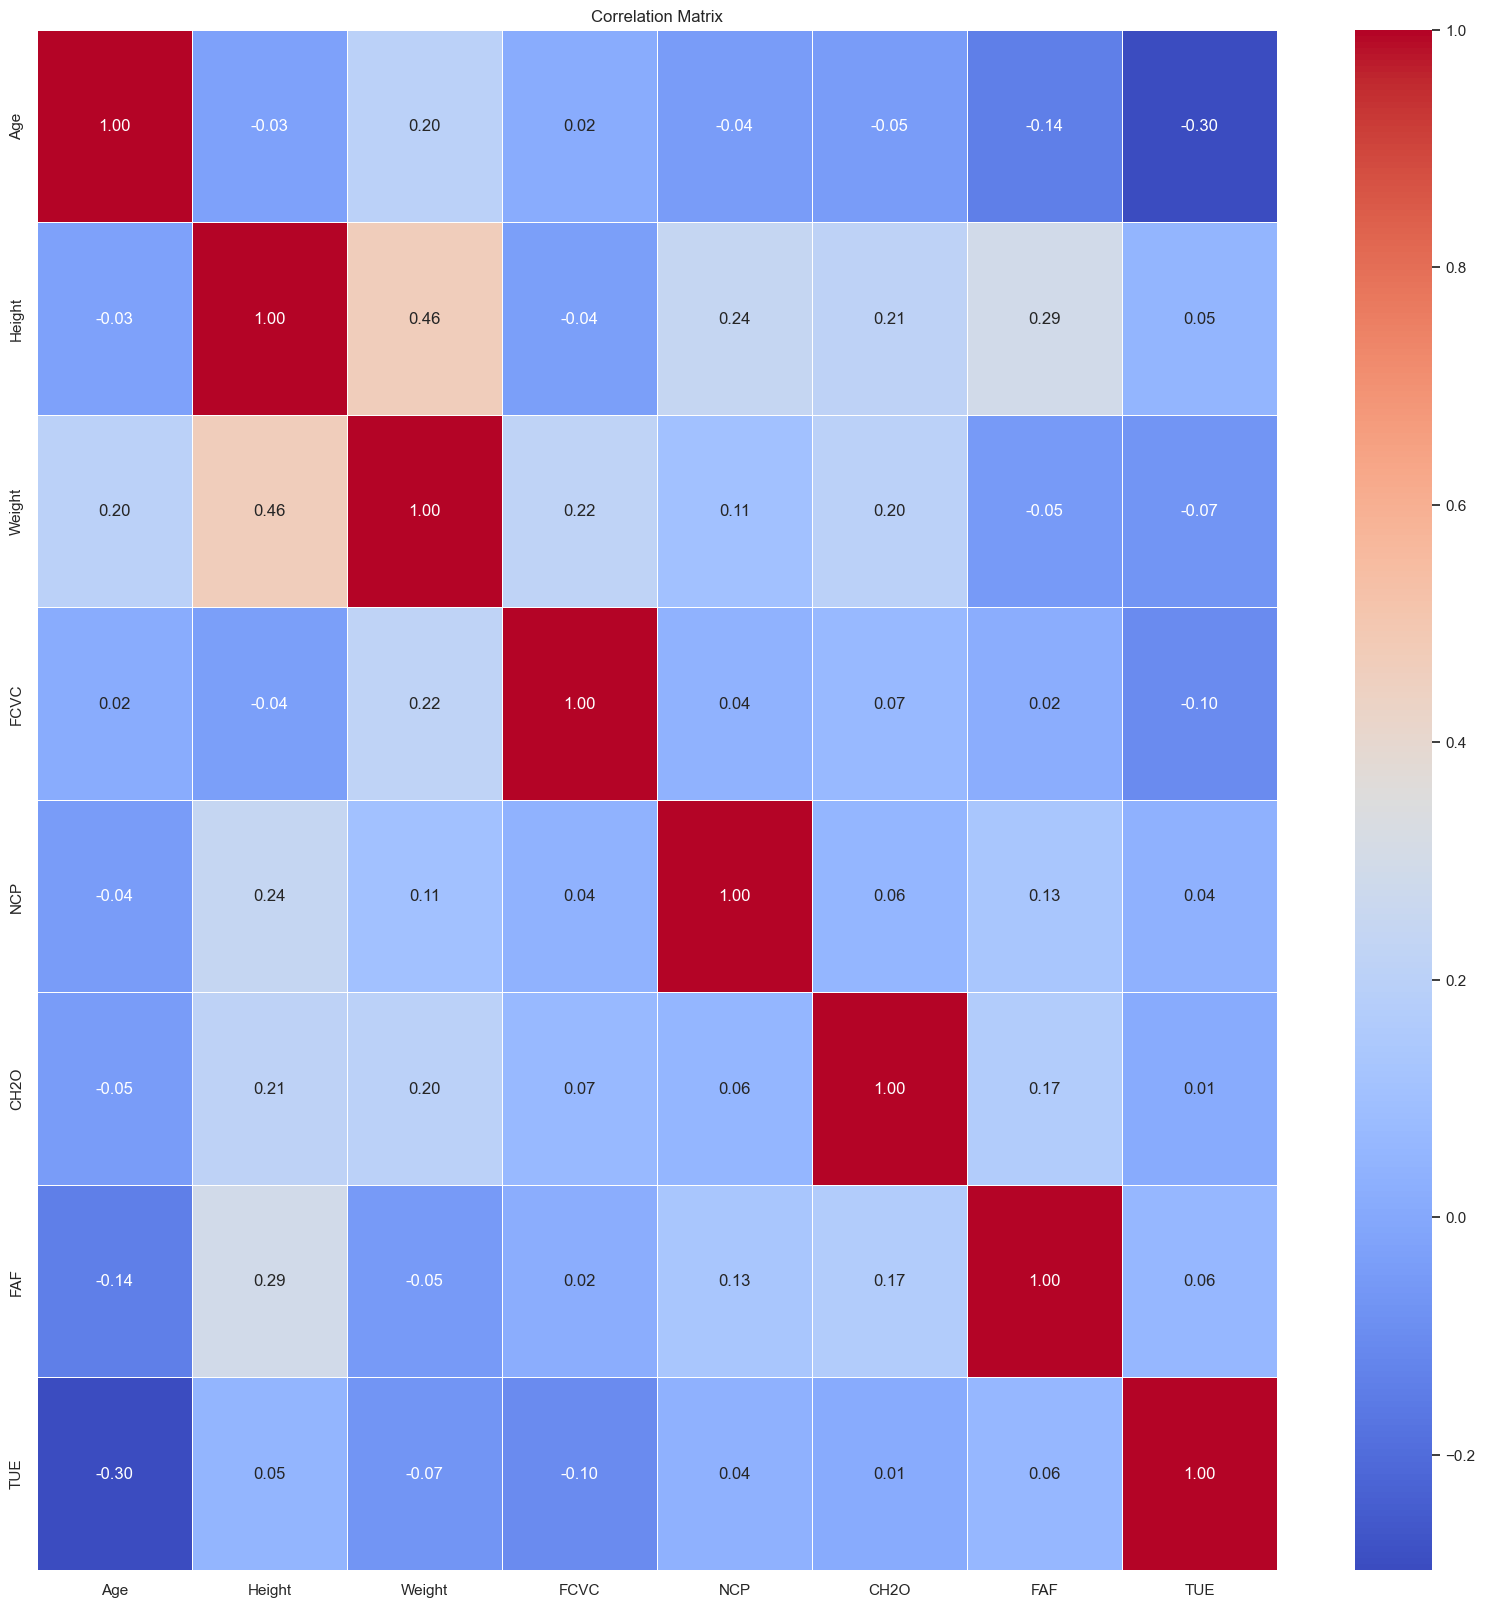

In [168]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


4. Data Preparation

In [169]:
categorical_columns_df = df.select_dtypes(include=['object']).columns
categorical_columns_df

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [170]:
numeric_columns_df = df.select_dtypes(include=['float64']).columns
numeric_columns_df

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [171]:
le = LabelEncoder()
for col in categorical_columns_df:
  df[col] = le.fit_transform(df[col])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [172]:
sc = StandardScaler()
df[numeric_columns_df] = sc.fit_transform(df[numeric_columns_df])
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


4. Classification

- Splitting Target and Features

In [173]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((1688, 16), (423, 16))

- Decision Tree using Criterion Entropy

In [175]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [176]:
y_pred_en = clf_en.predict(X_test)
y_pred_en

array([0, 4, 0, 1, 5, 0, 3, 5, 6, 0, 6, 4, 2, 3, 4, 6, 4, 2, 2, 6, 3, 5,
       4, 2, 1, 5, 6, 4, 4, 0, 4, 5, 6, 1, 1, 4, 2, 0, 1, 5, 1, 3, 5, 6,
       6, 0, 2, 1, 6, 3, 5, 1, 5, 5, 0, 6, 3, 3, 6, 2, 5, 4, 6, 0, 3, 6,
       5, 4, 0, 1, 6, 6, 1, 0, 5, 3, 3, 5, 4, 3, 1, 6, 2, 2, 6, 6, 1, 6,
       1, 6, 6, 2, 0, 5, 6, 0, 5, 6, 6, 3, 2, 6, 4, 2, 5, 5, 1, 4, 4, 3,
       2, 5, 2, 1, 0, 6, 6, 3, 6, 5, 4, 3, 6, 6, 5, 2, 6, 6, 4, 3, 4, 3,
       5, 6, 6, 4, 0, 4, 1, 6, 5, 6, 0, 0, 0, 3, 3, 4, 0, 2, 1, 0, 1, 3,
       6, 5, 6, 5, 0, 1, 5, 0, 6, 1, 3, 0, 3, 5, 1, 5, 5, 6, 3, 4, 6, 5,
       6, 6, 2, 5, 1, 3, 0, 1, 3, 2, 5, 4, 3, 2, 1, 4, 0, 5, 4, 5, 3, 6,
       4, 5, 3, 2, 4, 4, 1, 4, 5, 6, 2, 4, 5, 6, 1, 2, 2, 0, 5, 3, 3, 3,
       4, 5, 3, 6, 3, 2, 1, 4, 5, 6, 5, 4, 5, 6, 0, 6, 6, 6, 2, 1, 6, 6,
       5, 2, 2, 2, 5, 2, 6, 5, 5, 2, 0, 6, 5, 6, 6, 3, 6, 5, 4, 4, 6, 2,
       6, 4, 4, 1, 5, 4, 3, 4, 6, 6, 3, 6, 3, 4, 2, 0, 1, 5, 6, 4, 4, 5,
       6, 6, 0, 3, 2, 6, 0, 3, 1, 6, 3, 3, 6, 6, 1,

In [177]:
print("Model accuracy score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6288


In [178]:
print("Training set score: {:0.4f}".format(clf_en.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_en.score(X_test, y_test)))

Training set score: 0.6540
Test set score: 0.6288


[Text(0.5, 0.875, 'x[3] <= 0.451\nentropy = 2.803\nsamples = 1688\nvalue = [216, 225, 273, 239, 261, 234, 240]'),
 Text(0.25, 0.625, 'x[3] <= -0.935\nentropy = 2.332\nsamples = 1095\nvalue = [216, 225, 185, 2, 0, 234, 233]'),
 Text(0.125, 0.375, 'x[2] <= -0.444\nentropy = 1.194\nsamples = 355\nvalue = [214, 126, 0, 0, 0, 12, 3]'),
 Text(0.0625, 0.125, 'entropy = 1.348\nsamples = 192\nvalue = [71, 106, 0, 0, 0, 12, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.537\nsamples = 163\nvalue = [143, 20, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[3] <= -0.403\nentropy = 1.979\nsamples = 740\nvalue = [2, 99, 185, 2, 0, 222, 230]'),
 Text(0.3125, 0.125, 'entropy = 1.523\nsamples = 259\nvalue = [2, 85, 2, 0, 0, 134, 36]'),
 Text(0.4375, 0.125, 'entropy = 1.689\nsamples = 481\nvalue = [0, 14, 183, 2, 0, 88, 194]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\nentropy = 1.534\nsamples = 593\nvalue = [0, 0, 88, 237, 261, 0, 7]'),
 Text(0.625, 0.375, 'x[13] <= 1.383\nentropy = 0.036\nsamples = 261\nvalue = [0, 0, 0, 1, 

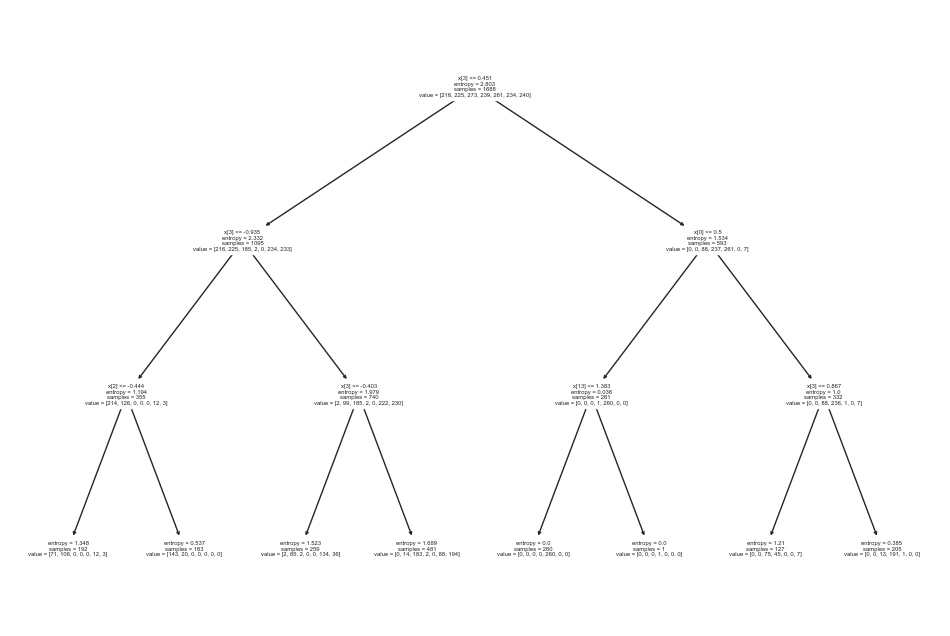

In [179]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

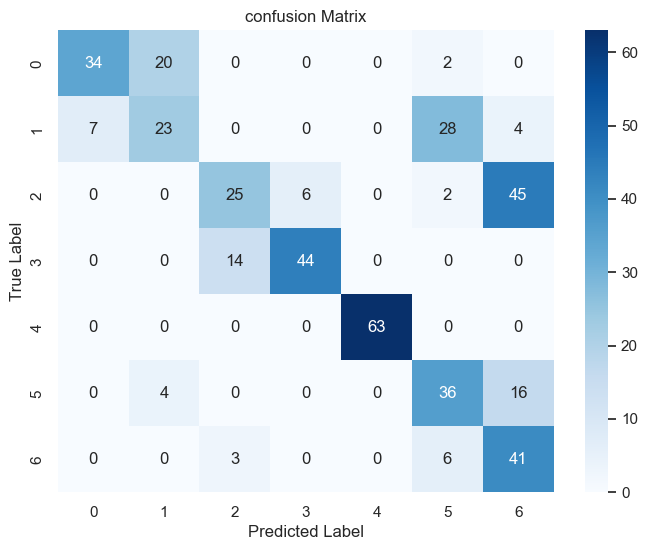

In [180]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [181]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70        56
           1       0.49      0.37      0.42        62
           2       0.60      0.32      0.42        78
           3       0.88      0.76      0.81        58
           4       1.00      1.00      1.00        63
           5       0.49      0.64      0.55        56
           6       0.39      0.82      0.53        50

    accuracy                           0.63       423
   macro avg       0.67      0.65      0.63       423
weighted avg       0.67      0.63      0.63       423



- Decision Tree using Gini Index

In [182]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [183]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([0, 4, 0, 1, 5, 0, 3, 5, 6, 0, 6, 4, 6, 3, 4, 6, 4, 3, 3, 6, 2, 5,
       4, 2, 1, 5, 6, 4, 4, 0, 4, 5, 6, 1, 1, 4, 2, 0, 1, 5, 1, 3, 5, 6,
       6, 0, 3, 1, 6, 3, 5, 1, 5, 5, 0, 6, 3, 3, 6, 2, 5, 4, 6, 0, 2, 6,
       5, 4, 0, 1, 6, 6, 1, 0, 5, 3, 3, 5, 4, 3, 1, 6, 3, 3, 6, 6, 1, 6,
       1, 6, 6, 3, 0, 5, 6, 0, 5, 6, 6, 3, 2, 6, 4, 2, 5, 5, 1, 4, 4, 3,
       6, 5, 6, 1, 0, 6, 6, 3, 6, 5, 4, 3, 6, 6, 5, 3, 6, 6, 4, 3, 4, 3,
       5, 6, 6, 4, 0, 4, 1, 6, 5, 6, 0, 0, 0, 3, 2, 4, 0, 2, 1, 0, 1, 3,
       6, 5, 6, 5, 0, 1, 5, 0, 6, 1, 3, 0, 3, 5, 1, 5, 5, 6, 3, 4, 6, 5,
       6, 6, 3, 5, 1, 3, 0, 5, 3, 2, 5, 4, 3, 3, 1, 4, 0, 5, 4, 5, 3, 6,
       4, 5, 3, 3, 4, 4, 1, 4, 5, 6, 3, 4, 5, 6, 1, 2, 3, 0, 5, 3, 3, 2,
       4, 5, 3, 6, 3, 6, 1, 4, 5, 6, 5, 4, 5, 6, 0, 6, 6, 6, 3, 1, 6, 6,
       5, 3, 6, 3, 5, 2, 6, 5, 5, 2, 0, 6, 5, 6, 6, 3, 6, 5, 4, 4, 6, 6,
       6, 4, 4, 1, 5, 4, 3, 4, 6, 6, 3, 6, 3, 4, 3, 0, 1, 5, 6, 4, 4, 5,
       6, 6, 0, 3, 3, 6, 0, 2, 1, 6, 3, 3, 6, 6, 1,

In [184]:
print("Model accuracy score with gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with gini index: 0.6336


In [185]:
print("Training set score: {:0.4f}".format(clf_gini.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(clf_gini.score(X_test, y_test)))

Training set score: 0.6564
Test set score: 0.6336


[Text(0.5, 0.875, 'x[3] <= 0.496\ngini = 0.856\nsamples = 1688\nvalue = [216, 225, 273, 239, 261, 234, 240]'),
 Text(0.25, 0.625, 'x[3] <= -1.013\ngini = 0.801\nsamples = 1108\nvalue = [216, 225, 192, 5, 0, 234, 236]'),
 Text(0.125, 0.375, 'x[2] <= -0.444\ngini = 0.479\nsamples = 333\nvalue = [212, 113, 0, 0, 0, 7, 1]'),
 Text(0.0625, 0.125, 'gini = 0.531\nsamples = 177\nvalue = [71, 98, 0, 0, 0, 7, 1]'),
 Text(0.1875, 0.125, 'gini = 0.174\nsamples = 156\nvalue = [141, 15, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.375, 'x[3] <= -0.403\ngini = 0.74\nsamples = 775\nvalue = [4, 112, 192, 5, 0, 227, 235]'),
 Text(0.3125, 0.125, 'gini = 0.615\nsamples = 281\nvalue = [4, 98, 2, 0, 0, 139, 38]'),
 Text(0.4375, 0.125, 'gini = 0.66\nsamples = 494\nvalue = [0, 14, 190, 5, 0, 88, 197]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\ngini = 0.615\nsamples = 580\nvalue = [0, 0, 81, 234, 261, 0, 4]'),
 Text(0.625, 0.375, 'x[13] <= 1.383\ngini = 0.008\nsamples = 261\nvalue = [0, 0, 0, 1, 260, 0, 0]'),
 Text(0.5625, 0.125,

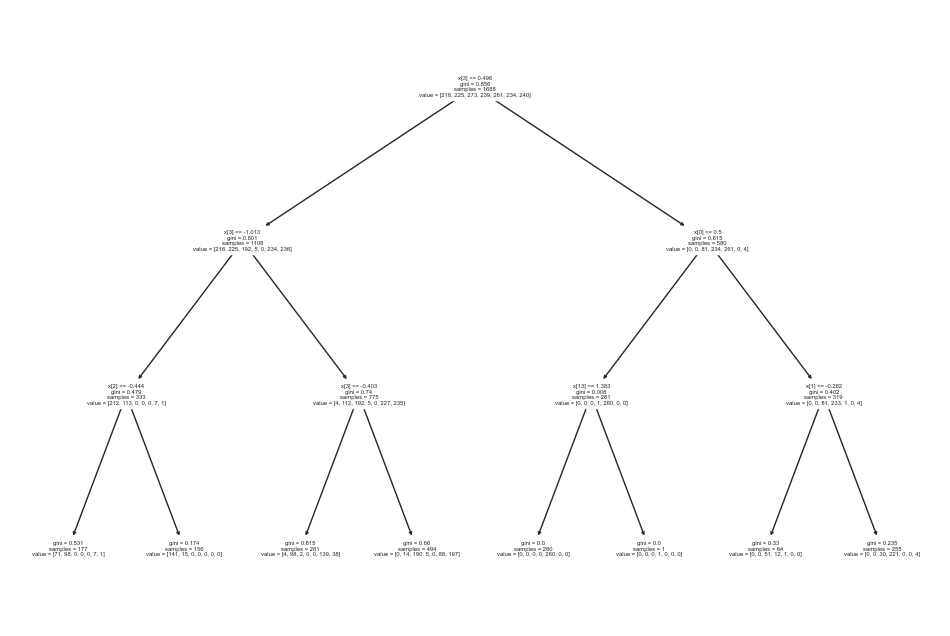

In [186]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

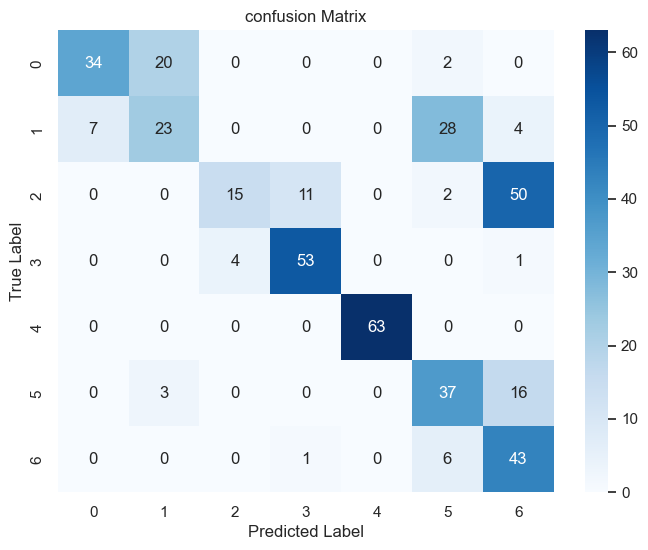

In [187]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [188]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70        56
           1       0.50      0.37      0.43        62
           2       0.79      0.19      0.31        78
           3       0.82      0.91      0.86        58
           4       1.00      1.00      1.00        63
           5       0.49      0.66      0.56        56
           6       0.38      0.86      0.52        50

    accuracy                           0.63       423
   macro avg       0.69      0.66      0.63       423
weighted avg       0.70      0.63      0.62       423



- Naive Bayes

In [189]:
nb_classifer = GaussianNB()
nb_classifer.fit(X_train, y_train)

GaussianNB()

In [190]:
nb_y_pred = nb_classifer.predict(X_test)
nb_y_pred

array([0, 4, 5, 0, 6, 0, 3, 2, 2, 0, 2, 4, 3, 3, 4, 1, 4, 3, 3, 2, 3, 2,
       4, 3, 0, 6, 2, 4, 4, 0, 4, 6, 2, 0, 0, 4, 3, 1, 0, 1, 0, 3, 2, 1,
       2, 0, 3, 5, 5, 3, 5, 0, 1, 5, 0, 6, 3, 3, 5, 2, 1, 4, 3, 0, 3, 5,
       1, 4, 0, 0, 2, 2, 0, 0, 2, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 2, 2, 2,
       1, 6, 6, 3, 0, 1, 6, 0, 5, 2, 5, 3, 3, 2, 4, 3, 6, 2, 0, 4, 4, 3,
       2, 5, 3, 0, 0, 2, 2, 3, 6, 2, 4, 3, 2, 2, 6, 3, 2, 2, 4, 3, 4, 3,
       5, 2, 2, 4, 0, 4, 0, 2, 2, 2, 0, 0, 1, 3, 3, 4, 0, 3, 0, 0, 0, 3,
       2, 2, 6, 2, 0, 0, 5, 0, 2, 0, 3, 0, 3, 5, 0, 6, 1, 5, 3, 4, 2, 6,
       2, 2, 3, 1, 0, 3, 0, 1, 3, 3, 5, 4, 6, 3, 0, 4, 0, 5, 4, 1, 3, 2,
       4, 5, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 3, 2, 0, 2, 3, 3, 2,
       4, 6, 3, 2, 3, 3, 0, 4, 5, 1, 2, 4, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       5, 3, 6, 3, 1, 3, 2, 2, 2, 3, 0, 6, 5, 2, 2, 3, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 0, 5, 4, 3, 4, 2, 2, 3, 2, 3, 4, 3, 0, 0, 2, 6, 4, 4, 2,
       2, 2, 2, 3, 2, 5, 0, 3, 0, 2, 3, 3, 2, 3, 0,

In [191]:
print("Model accuracy score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test, nb_y_pred)))

Model accuracy score with Naive Bayes: 0.6407


In [192]:
print("Training set score: {:0.4f}".format(nb_classifer.score(X_train, y_train)))
print("Test set score: {:0.4f}".format(nb_classifer.score(X_test, y_test)))

Training set score: 0.6197
Test set score: 0.6407


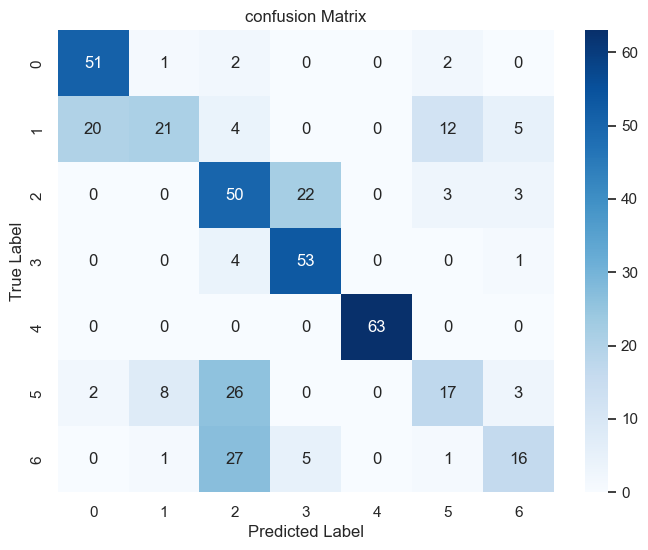

In [193]:
cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [194]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



5. Clustering

- Data preprocessing

In [195]:
df_features = df.drop(columns=['NObeyesdad'])
df_features.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3


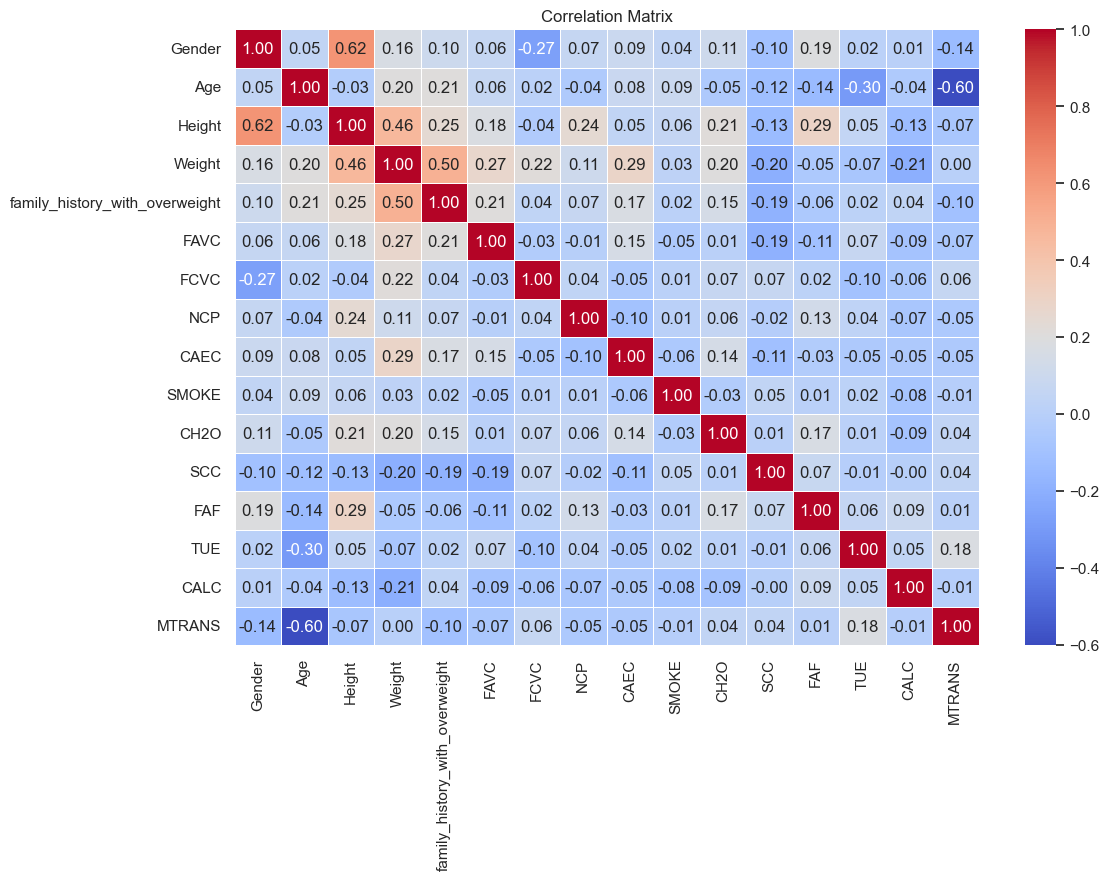

In [196]:
correlation_matrix = df_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [197]:
sse =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_features)
    sse.append(kmeans.inertia_)

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

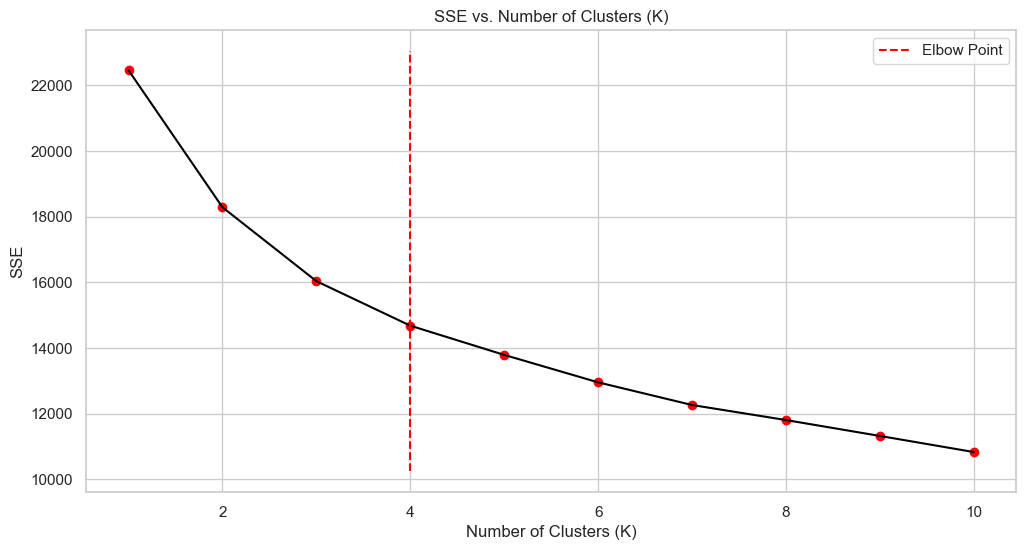

In [198]:
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='red')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()

In [199]:
findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  4


In [200]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300,random_state=42)
y_pred = kmeans.fit_predict(df_features)
df_features['KMeans'] = y_pred
y_pred

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 3, 3, 3])

In [201]:
cluster_summary = df_features.groupby('KMeans').agg({
    'Gender': pd.Series.mode,
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'family_history_with_overweight': pd.Series.mode,
    'FAVC': pd.Series.mode,
    'FCVC': 'mean',
    'NCP': 'mean',
    'CAEC': pd.Series.mode,
    'SMOKE': pd.Series.mode,
    'CH2O': 'mean',
    'SCC': pd.Series.mode,
    'FAF': 'mean',
    'TUE': 'mean',
    'CALC': pd.Series.mode,
    'MTRANS': pd.Series.mode
})

cluster_summary

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
KMeans,,,,,,,,,,,,,,,,
0,1,1.176695,0.137155,-0.029988,1,1,-0.104579,0.105555,2,0,-0.079943,0,0.011869,-0.327595,2,0
1,0,-0.556055,-0.266663,-0.746847,1,1,-0.353052,0.500587,2,0,-0.158291,0,0.234902,0.431761,2,3
2,0,-0.437153,-0.700690,-0.579486,1,1,-0.152958,-1.918405,2,0,-0.124470,0,-0.325886,0.094801,2,3
3,1,-0.066540,0.479056,0.997266,1,1,0.477973,0.315834,2,0,0.261923,0,-0.085756,-0.234533,2,3


In [202]:
df_features.groupby('KMeans')['KMeans'].agg(pd.Series.count)

KMeans
0    463
1    655
2    309
3    684
Name: KMeans, dtype: int64

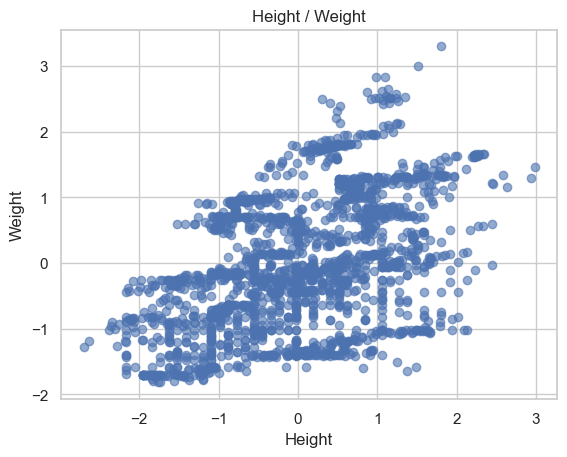

In [203]:
plt.scatter(df_features["Height"], df_features["Weight"], alpha=0.6)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height / Weight")
plt.show()

C:\Users\Belinda\AppData\Local\Temp\ipykernel_21096\2026956593.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x = "Height", y="Weight", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend =  None, data = df_features, s= 60)


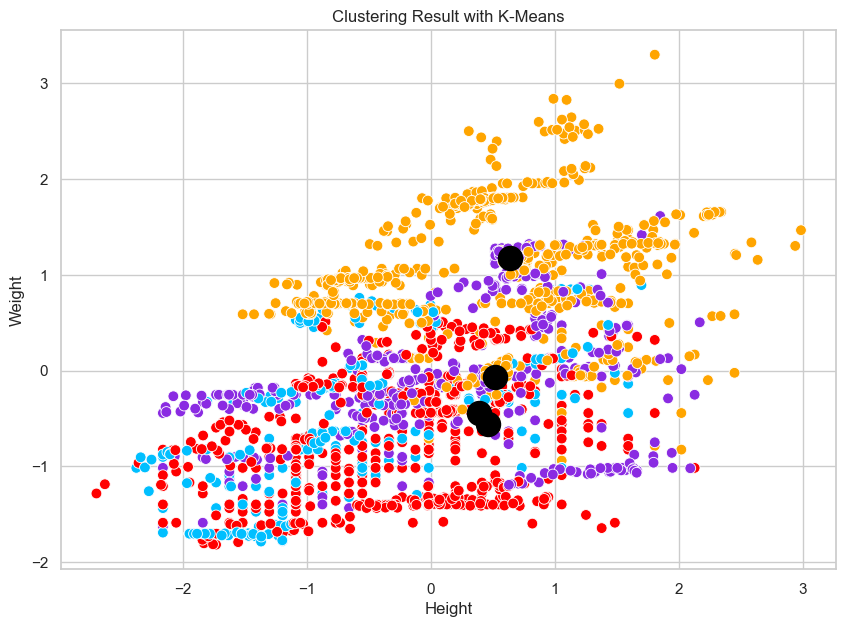

In [204]:
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Height", y="Weight", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend =  None, data = df_features, s= 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clustering Result with K-Means")
plt.show()

- Hierarchihcal Clustering

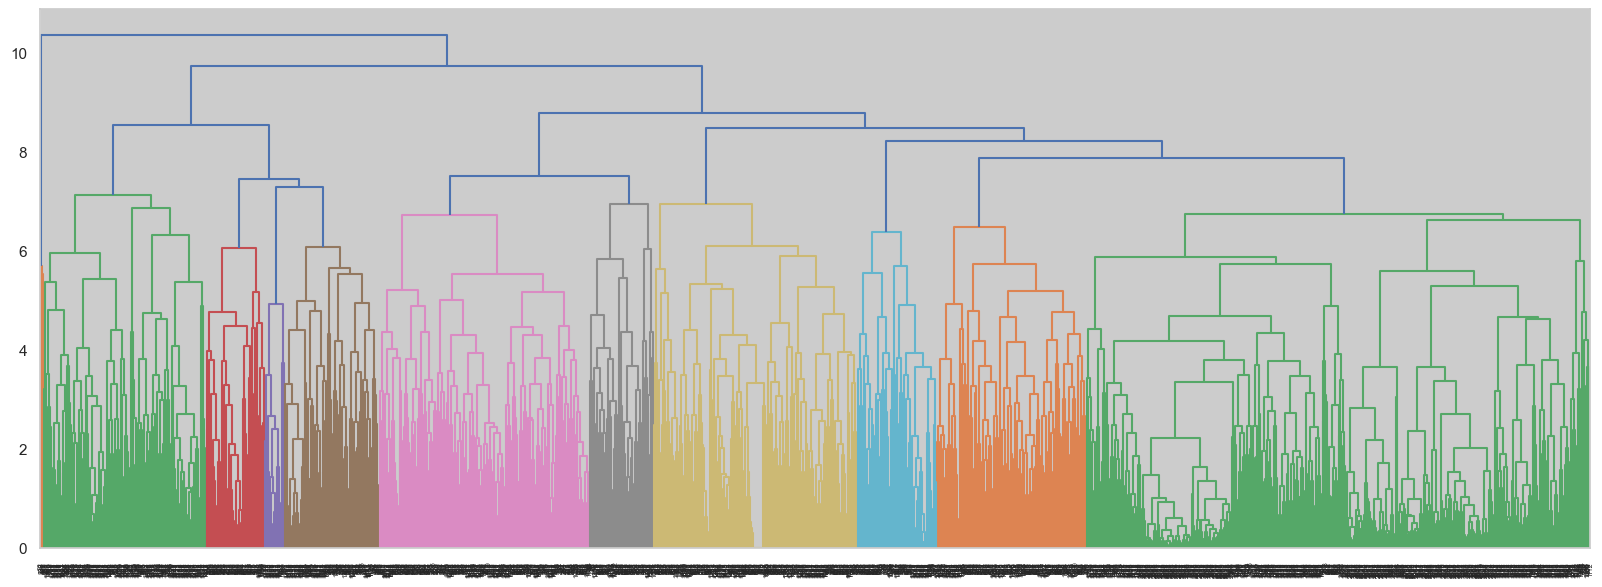

In [205]:
#Plot the dendrogram to help determine the number of clusters, using the 'max' method.
plt.figure(figsize=(20,7))
linkage_data = linkage(df_features, method='complete')
dendrogram(linkage_data)
plt.show()

In [206]:
model = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean')
y_predAC = model.fit_predict(df_features)
df_features['Agglo'] = y_predAC
y_predAC

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [207]:
cluster_summaryAC = df_features.groupby('Agglo').agg({
    'Gender': pd.Series.mode,
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'family_history_with_overweight': pd.Series.mode,
    'FAVC': pd.Series.mode,
    'FCVC': 'mean',
    'NCP': 'mean',
    'CAEC': pd.Series.mode,
    'SMOKE': pd.Series.mode,
    'CH2O': 'mean',
    'SCC': pd.Series.mode,
    'FAF': 'mean',
    'TUE': 'mean',
    'CALC': pd.Series.mode,
    'MTRANS': pd.Series.mode
})
cluster_summaryAC

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
Agglo,,,,,,,,,,,,,,,,
0,1,-0.080346,0.409234,0.987669,1,1,0.506261,0.263834,2,0,0.203138,0,-0.114270,-0.196461,2,3
1,1,1.166761,0.143874,-0.037346,1,1,-0.122429,0.118180,2,0,-0.068432,0,0.016054,-0.314713,2,0
2,0,-0.560571,-0.279065,-0.752221,1,1,-0.339620,0.499943,2,0,-0.165203,0,0.238794,0.427926,2,3
3,0,-0.440293,-0.590238,-0.636492,1,1,-0.262270,-1.917317,2,0,-0.010706,0,-0.279100,0.029150,2,3


- Single Linkage Visualization

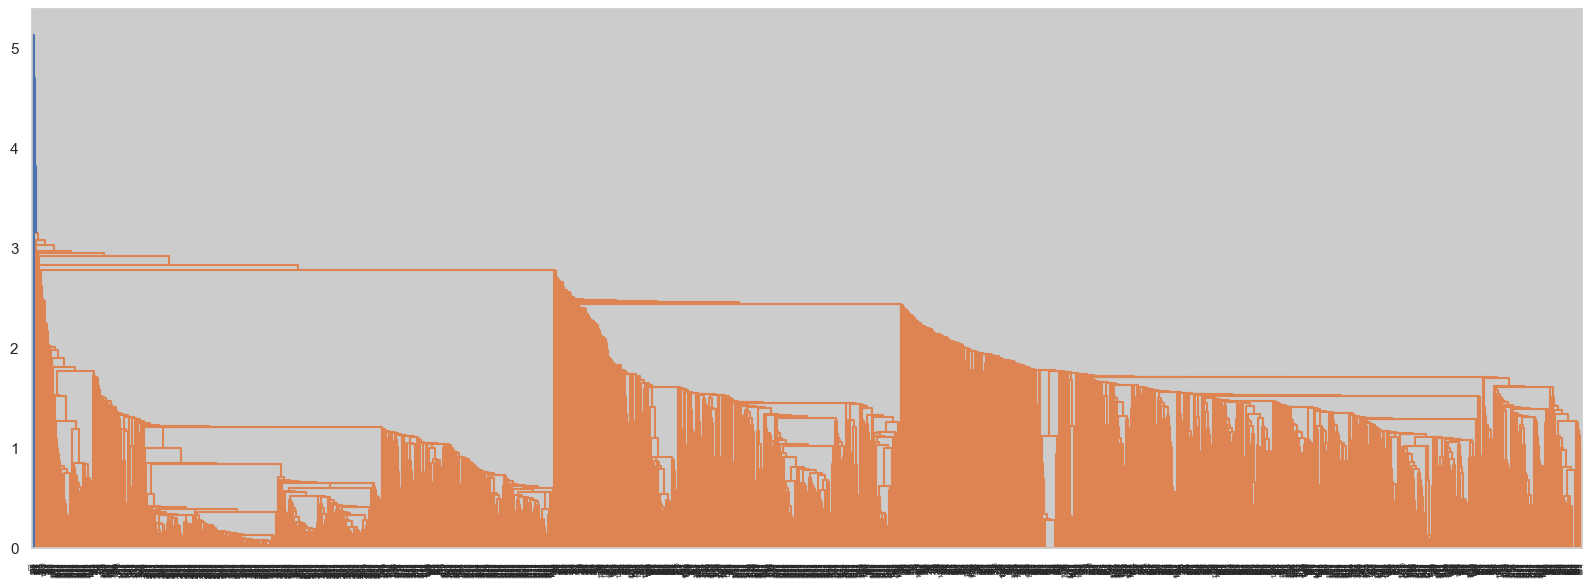

In [208]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_features, method='single')
dendrogram(linkage_data)
plt.show()

- Complete Linkage Visualization

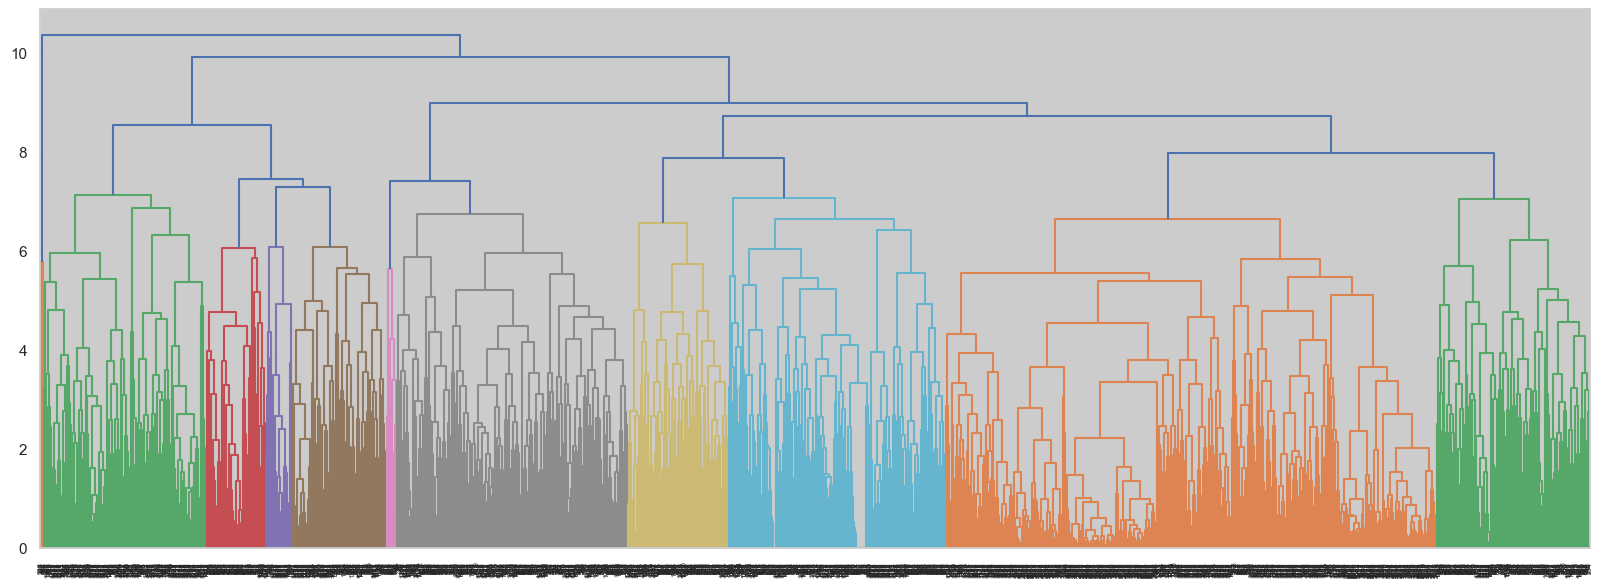

In [209]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_features, method='complete')
dendrogram(linkage_data)
plt.show()

- Average Linkage Visualization

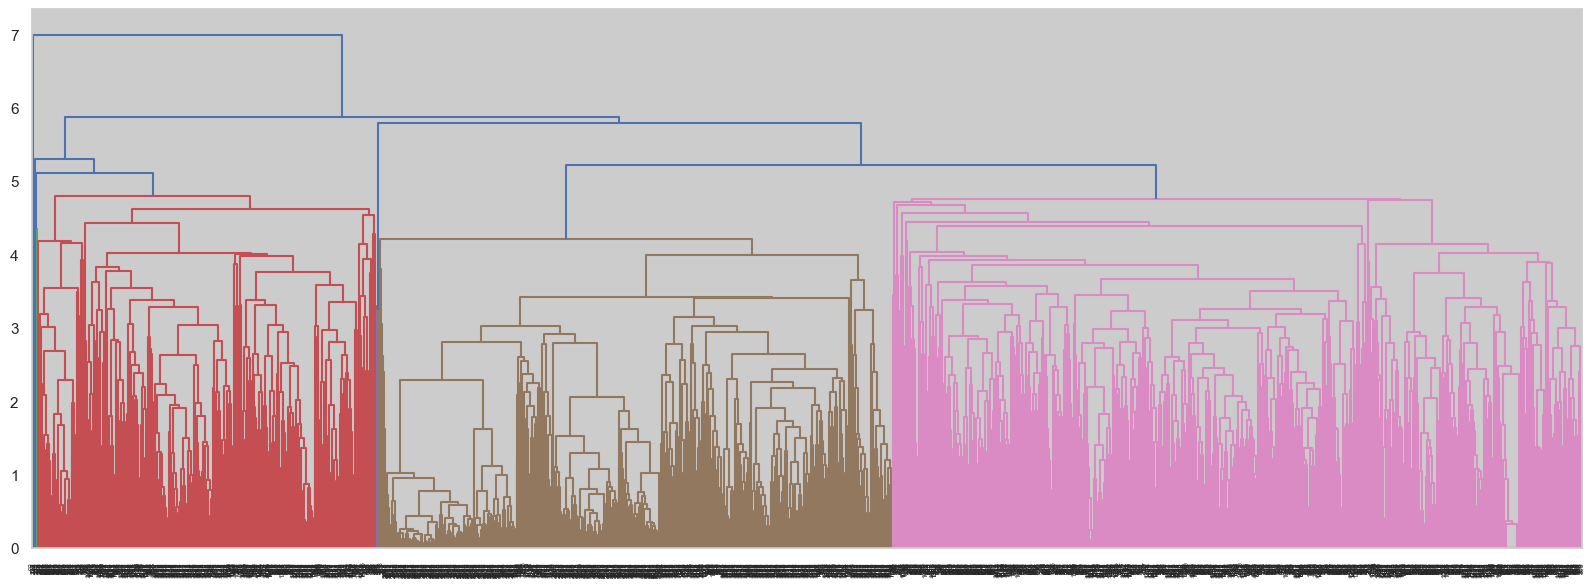

In [210]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_features, method='average')
dendrogram(linkage_data)
plt.show()

- Ward Linkage Visualization

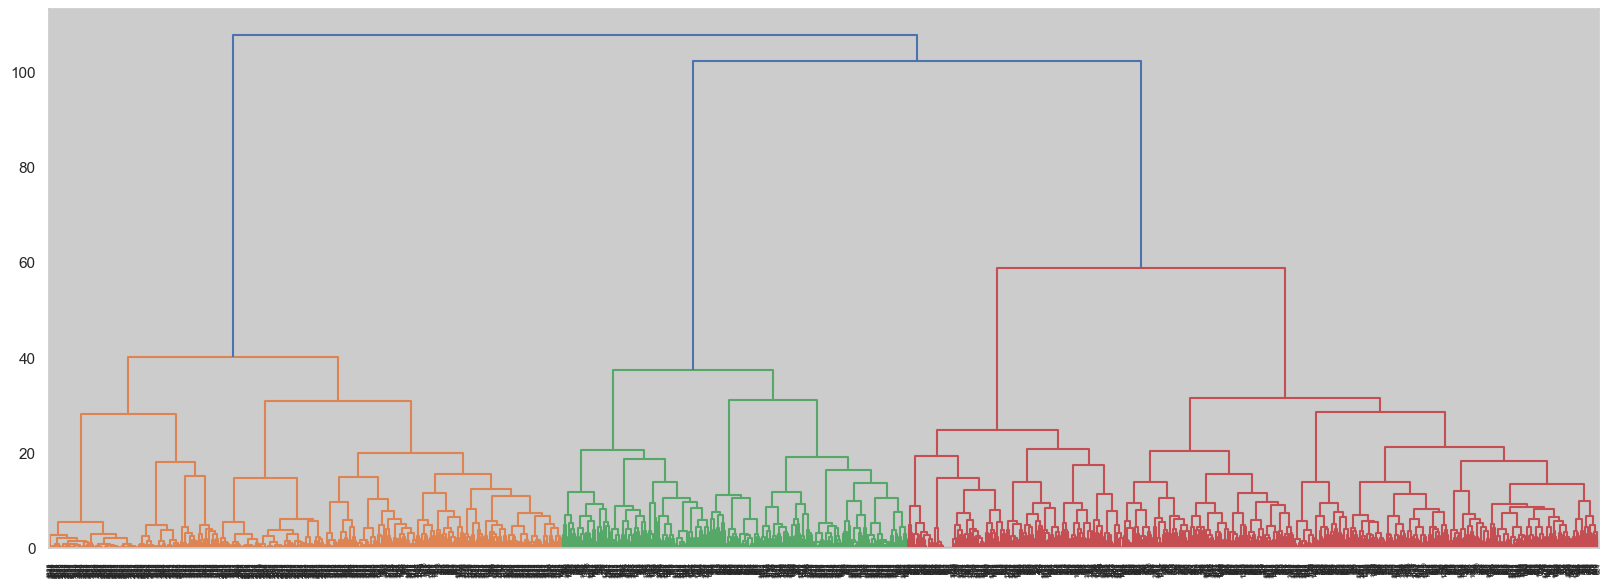

In [211]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_features, method='ward')
dendrogram(linkage_data)
plt.show()